In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import glob, re

import sys
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors

sys.path.append('../../src')
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.RHEED.Analysis_umich import fit_curves, analyze_rheed_data, plot_activation_energy, read_txt_to_numpy, select_range

ImportError: cannot import name 'read_txt_to_numpy' from 'm3_learning.RHEED.Analysis_umich' (../../src\m3_learning\RHEED\Analysis_umich.py)

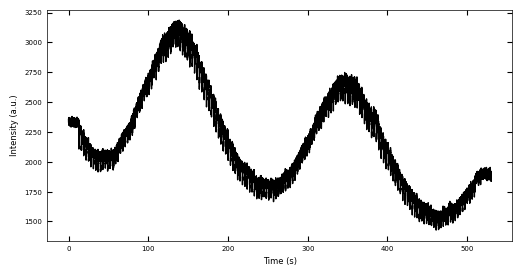

In [19]:
file = './Saved_data/8-21-2023/STO 650C PeterManualRelaxation (.33Hz-33ms).txt'
data = np.loadtxt(file)
sample_x, sample_y = data[:,0], data[:,1]
plt.figure(figsize=(6, 3))
plt.plot(sample_x, sample_y, color='k', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()

./Saved_data/rheed_data/PM16_STO/650C_secondorder.txt


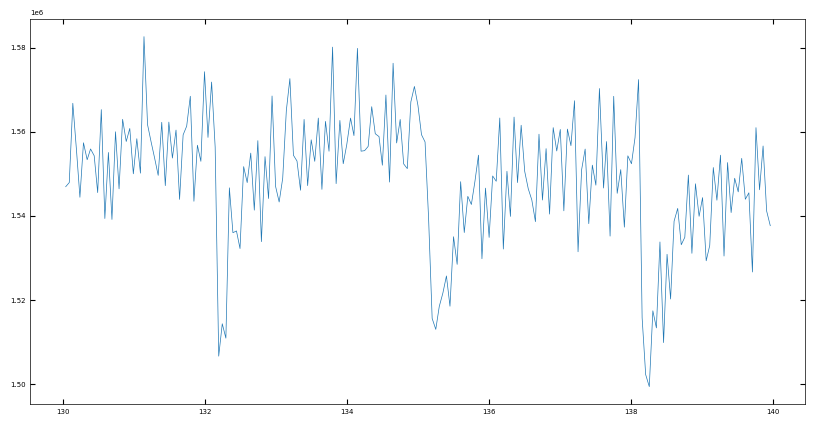

In [24]:
file = './Saved_data/rheed_data/PM16_STO/650C_secondorder.txt'
range = (130, 140)
print(file)
header, data = read_txt_to_numpy(file)
data = select_range(data, *range)
sample_x, sample_y = data[:,0], data[:,1]

plt.figure(figsize=(10, 5))
plt.plot(sample_x, sample_y)
plt.show()

In [ ]:
for file in glob.glob('./Saved_data/8-21-2023/*.txt'):
    range = (30, 40)
    print(file)
    data = np.loadtxt(file)
    data = select_range(data, *range)
    sample_x, sample_y = data[:,0], data[:,1]

    plt.figure(figsize=(10, 5))
    plt.plot(sample_x, sample_y)
    plt.show()

./Saved_data/rheed_data/PM16_STO\630C_secondorder.txt


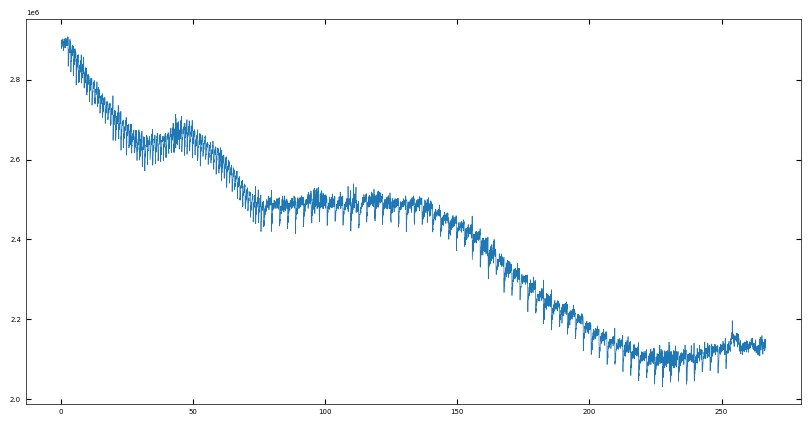

./Saved_data/rheed_data/PM16_STO\630C_secondorder_2.txt


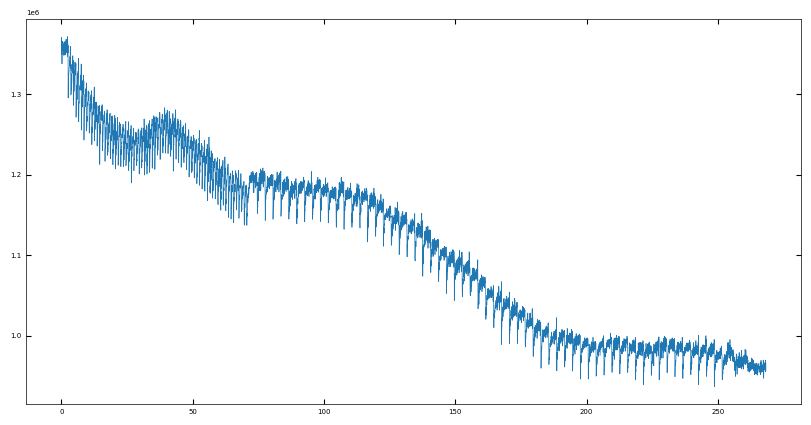

./Saved_data/rheed_data/PM16_STO\650C_secondorder.txt


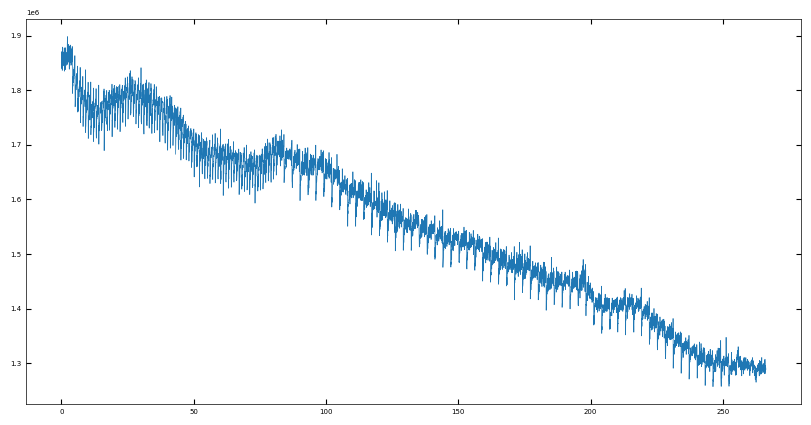

./Saved_data/rheed_data/PM16_STO\650C_secondorder_2.txt


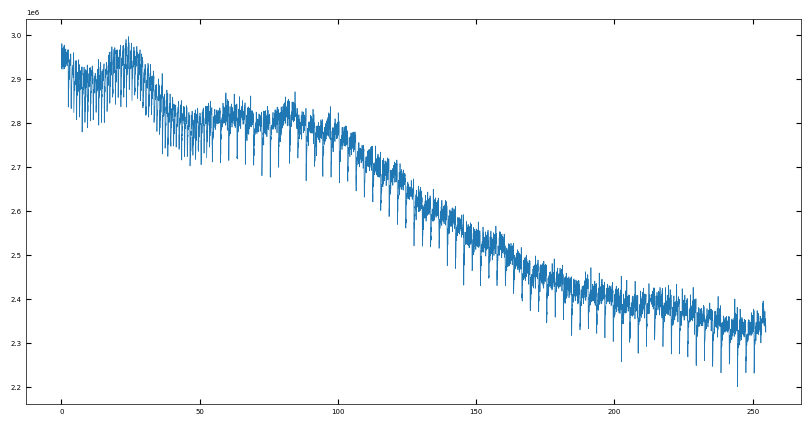

./Saved_data/rheed_data/PM16_STO\670C_secondorder.txt


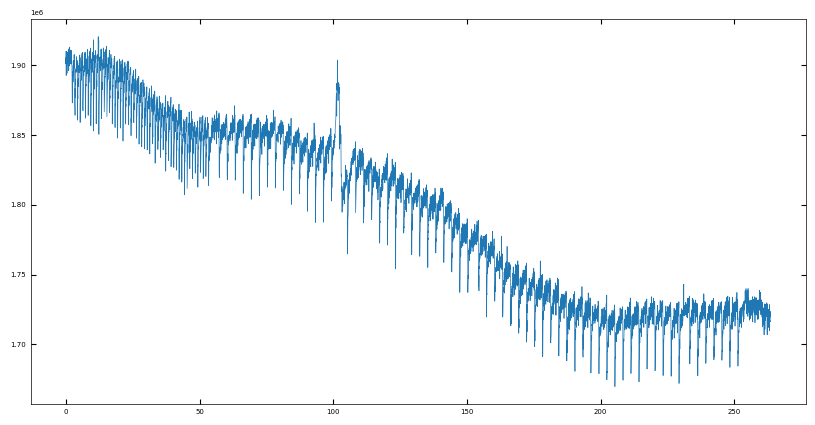

./Saved_data/rheed_data/PM16_STO\690C_secondorder.txt


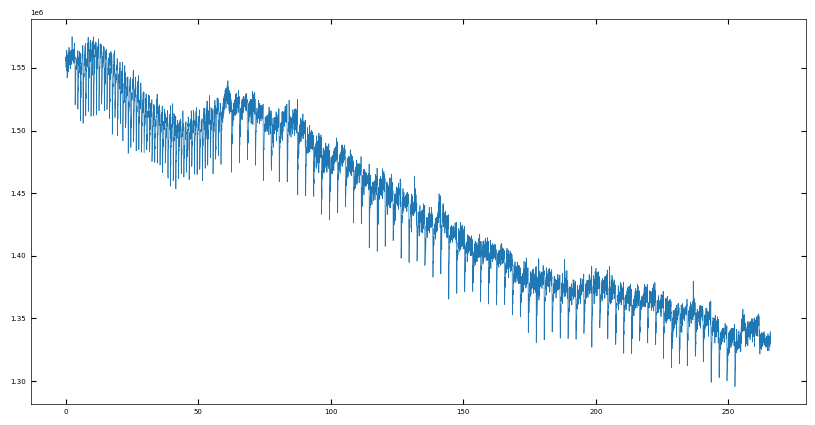

./Saved_data/rheed_data/PM16_STO\710C_secondorder.txt


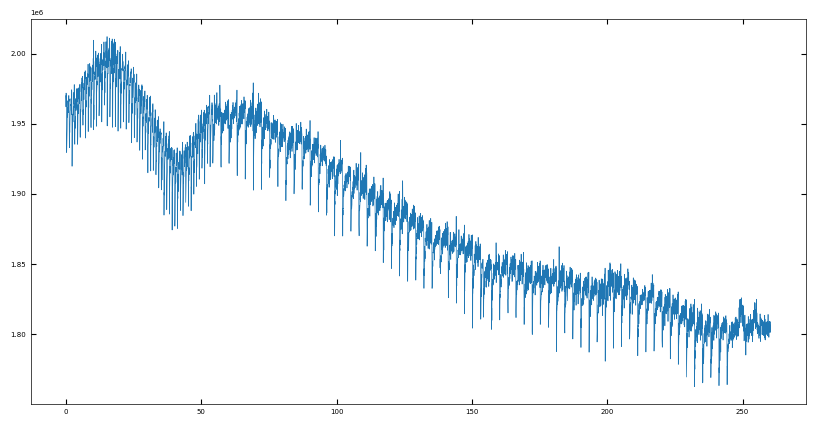

./Saved_data/rheed_data/PM16_STO\800C_secondorder.txt


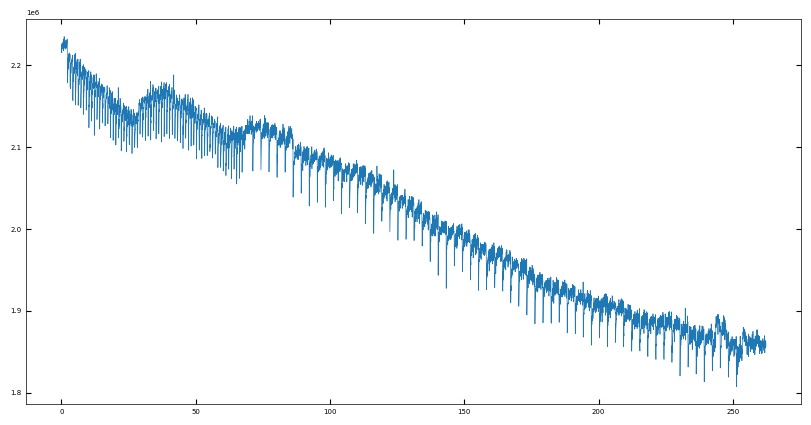

In [5]:
tau_list, temp_list = [], []
for file in glob.glob('./Saved_data/rheed_data/PM16_STO/*.txt'):
    print(file)
    header, data = read_txt_to_numpy(file)
    sample_x, sample_y = data[:,0], data[:,1]
    plt.figure(figsize=(10, 5))
    plt.plot(sample_x, sample_y)
    plt.show()

./Saved_data/rheed_data/PM16_STO\630C_secondorder.txt


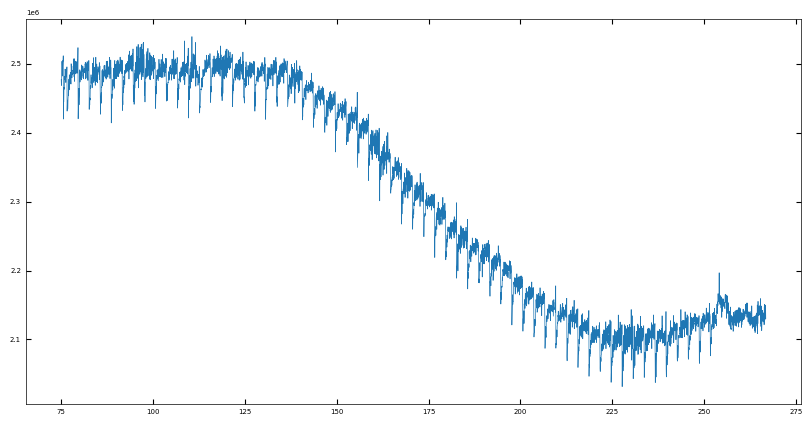

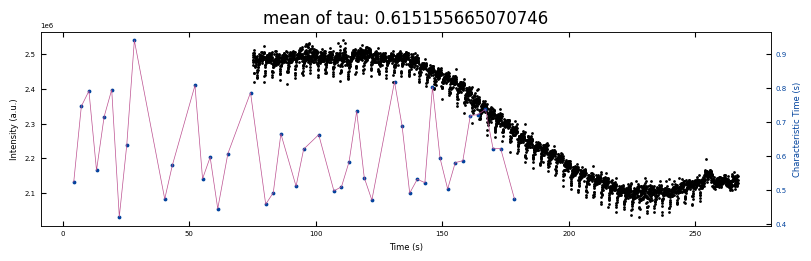

In [21]:
detect_param={'step_size':5, 'prominence':20, }
fit_settings =  {'savgol_window_order': (15, 3), 'pca_component': 10, 'I_diff': None, 
                'unify':False, 'bounds':[0.001, 1], 'p_init':[0.1, 0.4, 0.1]}
laser_freq = 0.25
camera_freq = 1000/50
viz_curves=False
viz_fittings=False
viz_ab=False

tau_list = []
temp_list = [630, 630, 650, 650, 670, 690, 710, 800]
range_list = [[75, 270], [70, 270], [70, 270], [60, 270],  [55, 270], [55, 270], [55, 270], [70, 270]]

for file, range in zip(glob.glob('./Saved_data/rheed_data/PM16_STO/*.txt')[:1], range_list[:1]):
    print(file)
    header, data = read_txt_to_numpy(file)
    data = select_range(data, *range)
    sample_x, sample_y = data[:,0], data[:,1]

    plt.figure(figsize=(10, 5))
    plt.plot(sample_x, sample_y)
    plt.show()
        
    parameters_all, x_list_all, info, tau = analyze_rheed_data(data, camera_freq, laser_freq, detect_param, viz_curves, viz_fittings, viz_ab, n_std=1, fit_settings=fit_settings)

    tau_list.append(tau)

./Saved_data/rheed_data/PM16_STO\630C_secondorder.txt


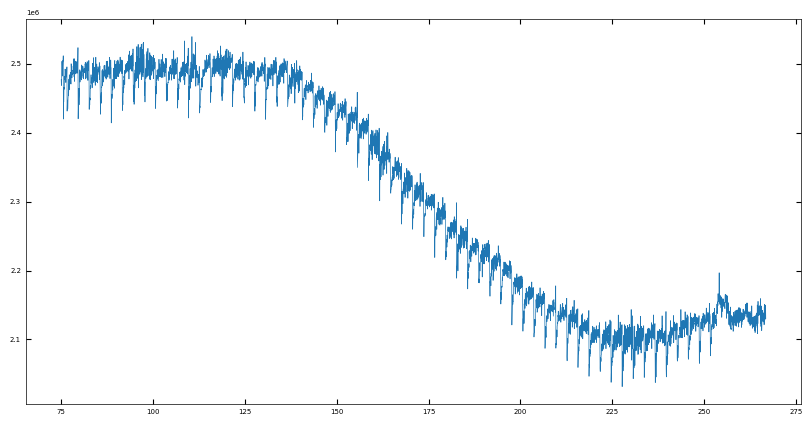

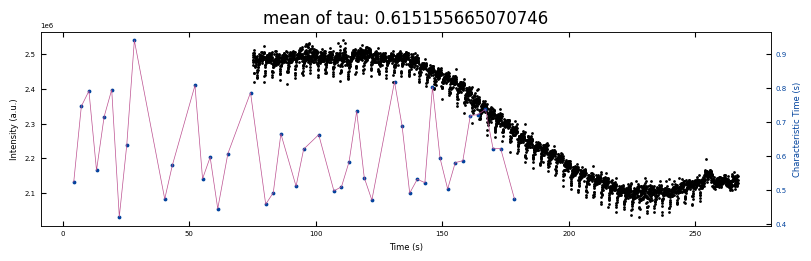

./Saved_data/rheed_data/PM16_STO\630C_secondorder_2.txt


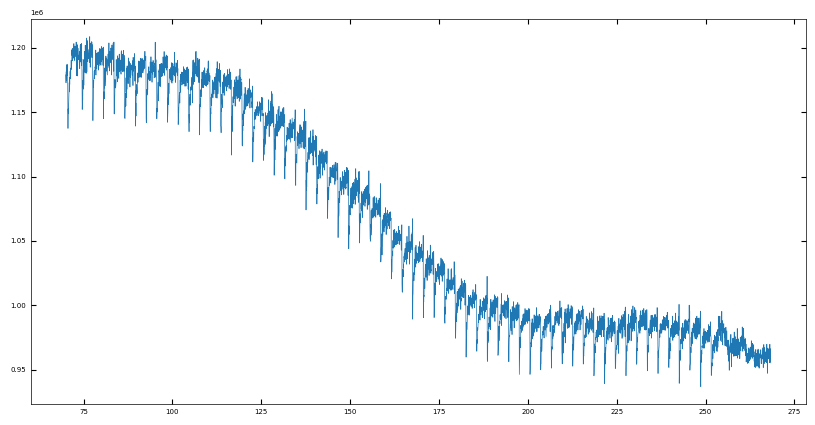

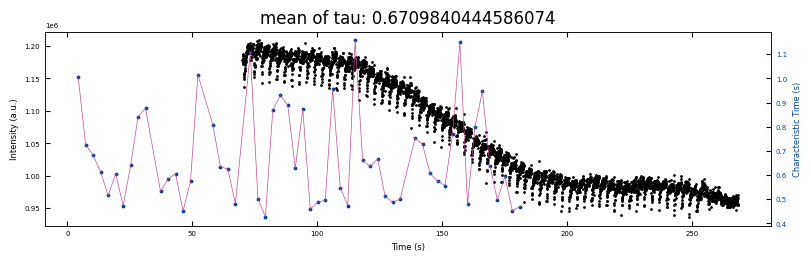

./Saved_data/rheed_data/PM16_STO\650C_secondorder.txt


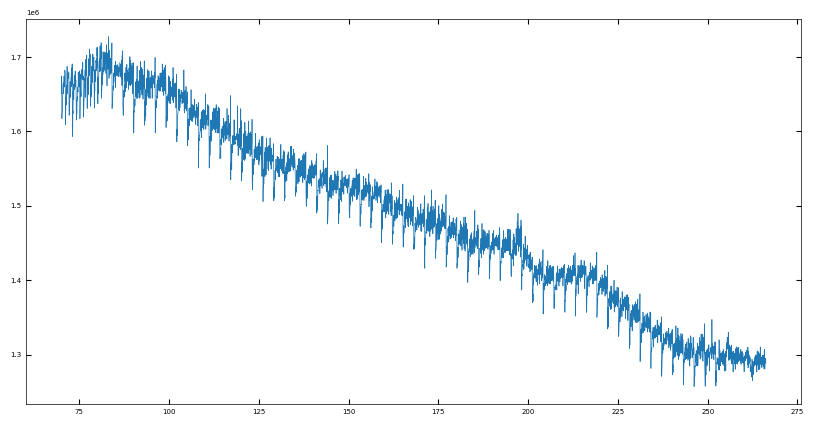

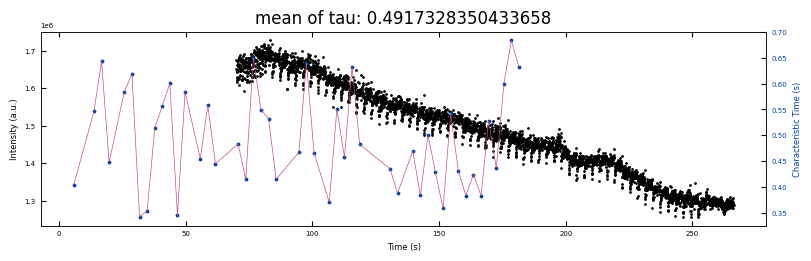

./Saved_data/rheed_data/PM16_STO\650C_secondorder_2.txt


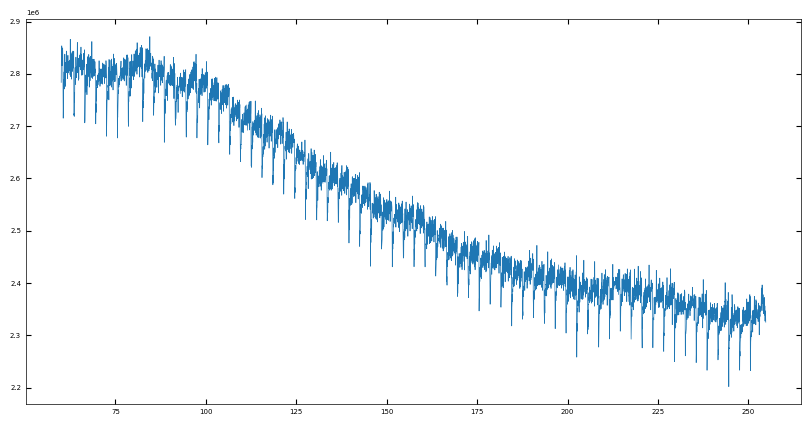

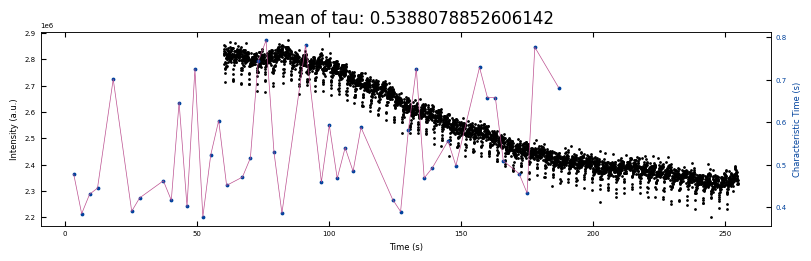

./Saved_data/rheed_data/PM16_STO\670C_secondorder.txt


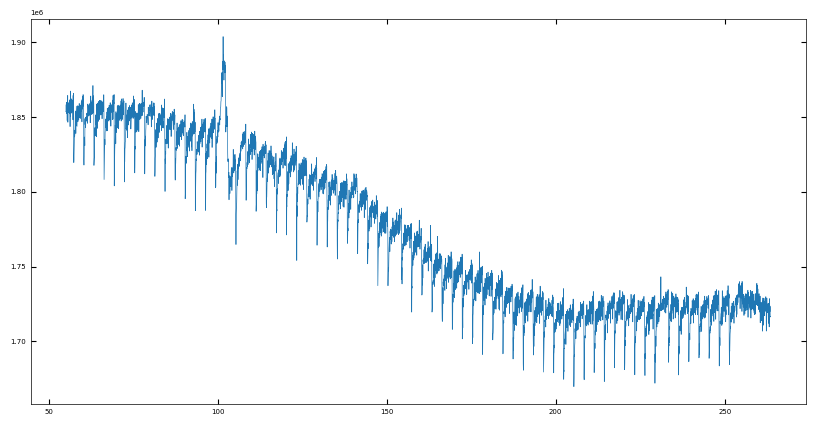

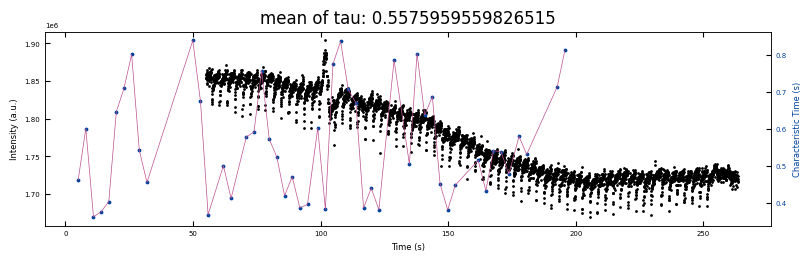

./Saved_data/rheed_data/PM16_STO\690C_secondorder.txt


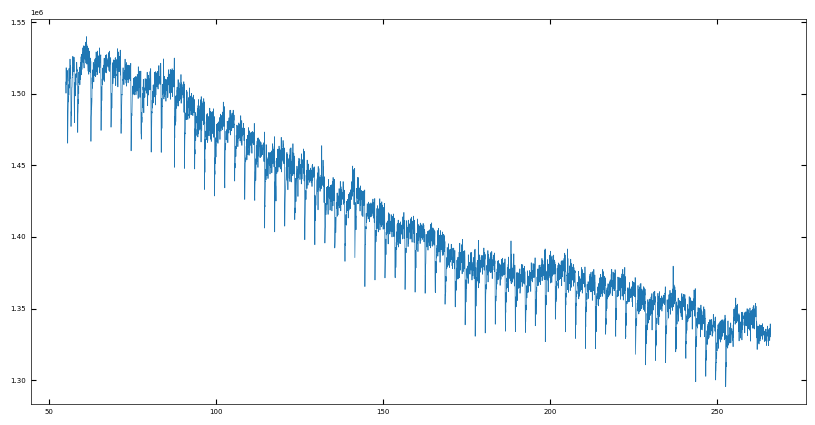

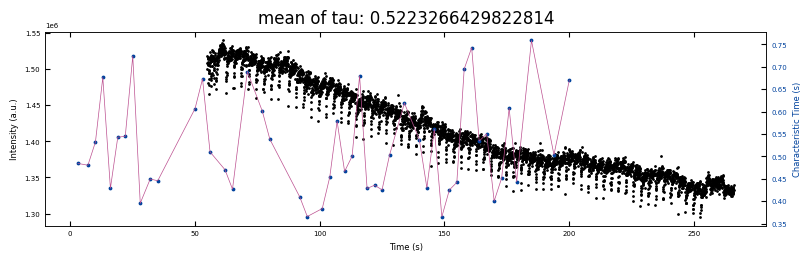

./Saved_data/rheed_data/PM16_STO\710C_secondorder.txt


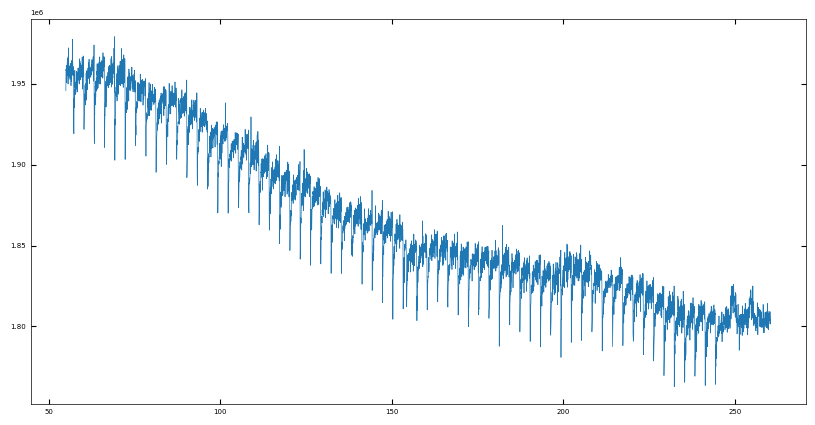

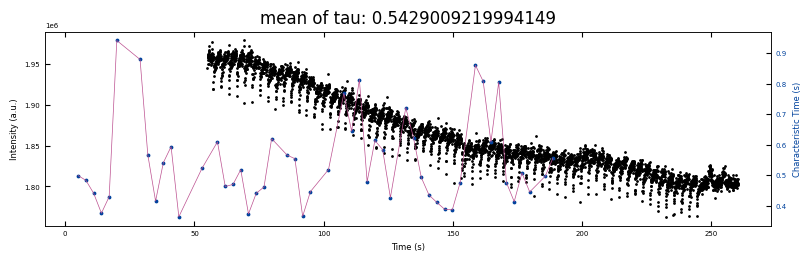

./Saved_data/rheed_data/PM16_STO\800C_secondorder.txt


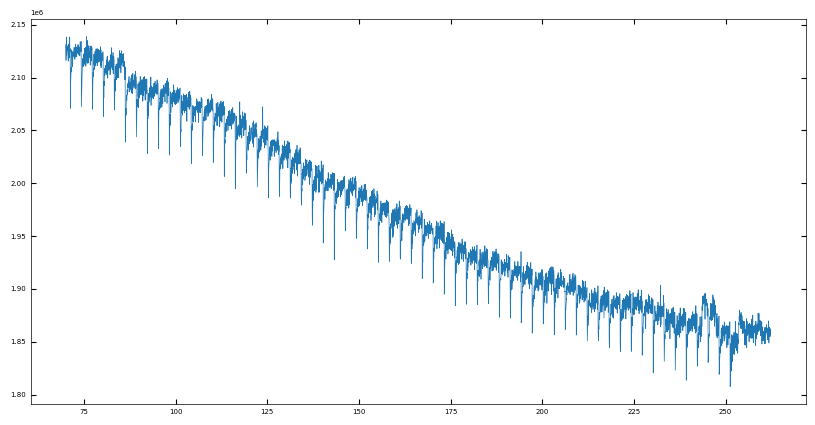

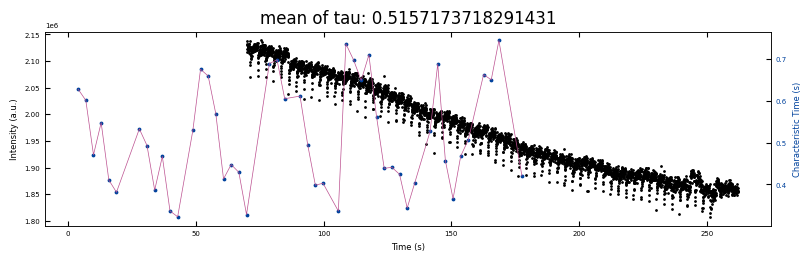

In [22]:
detect_param={'step_size':5, 'prominence':5}
fit_settings =  {'savgol_window_order': (15, 3), 'pca_component': 10, 'I_diff': None, 
                'unify':False, 'bounds':[0.001, 1], 'p_init':[0.1, 0.4, 0.1]}
laser_freq = 0.25
camera_freq = 1000/50
viz_curves=False
viz_fittings=False
viz_ab=False

tau_list = []
temp_list = [630, 630, 650, 650, 670, 690, 710, 800]
range_list = [[75, 270], [70, 270], [70, 270], [60, 270],  [55, 270], [55, 270], [55, 270], [70, 270]]

for file, range in zip(glob.glob('./Saved_data/rheed_data/PM16_STO/*.txt'), range_list):
    print(file)
    header, data = read_txt_to_numpy(file)
    data = select_range(data, *range)
    sample_x, sample_y = data[:,0], data[:,1]

    plt.figure(figsize=(10, 5))
    plt.plot(sample_x, sample_y)
    plt.show()
        
    parameters_all, x_list_all, info, tau = analyze_rheed_data(data, camera_freq, laser_freq, detect_param, viz_curves, viz_fittings, 
                                                                viz_ab, n_std=1, fit_settings=fit_settings)

    tau_list.append(tau)

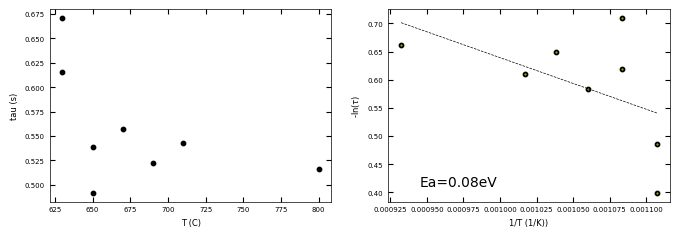

In [12]:
plot_activation_energy(temp_list, tau_list)